<a href="https://colab.research.google.com/github/shivam110601/abide_cnn_btech/blob/main/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nibabel as nib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imageio
import os
import random

random.seed(10)

In [ ]:
# Display array values to 4 digits of precision
np.set_printoptions(precision=4, suppress=True)

def extract_2d_slices(nii_file_path, output_dir, j):
  # Load the .nii.gz fMRI file.
  img = nib.load(nii_file_path)

  # Get the raw data of the .nii.gz fMRI file.
  data = img.get_fdata()

  # for i in range(11, 21):   # 3d files
  #   slice_data = data[:, :, i]
  #   plt.figure()
  #   plt.imshow(slice_data, cmap='gray')
  #   plt.axis('off')  # Turn off axis labels

  #   # Save the PNG image (you can customize the filename as needed)
  #   png_filename = os.path.join(output_dir, f'slice{j:07d}_{i:03d}.png')
  #   plt.imsave(png_filename, slice_data, cmap='gray')
  #   plt.close()
  for i in range(10, 20):
    slice_data = data[:, :, i, 125]
    plt.figure()
    # plt.imshow(slice_data, cmap='gray')
    # plt.axis('off')  # Turn off axis labels

    # # Save the PNG image (you can customize the filename as needed)
    png_filename = os.path.join(output_dir, f'slice{j:07d}_{i:03d}.png')
    plt.imsave(png_filename, slice_data, cmap='gray')
    plt.close()

  # print(img.shape)
  # print(img.header)



if __name__ == "__main__":
  # Get the output directory.
  output_dir = "/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/test/ASD"
  #asd
  for j in range(50743, 50758): #/content/drive/MyDrive/ABIDE-I dataset/Leuven_2/0050722/session_1/rest_1/rest.nii.gz
    nii_file_path = "/content/drive/MyDrive/ABIDE-I dataset/Leuven_2/"+f"{j:07d}"+"/session_1/rest_1/rest.nii.gz"
    # Extract the 2D slices from the .nii.gz fMRI file and save them as PNG images.
    extract_2d_slices(nii_file_path, output_dir, j)

  output_dir = "/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/test/TC"
  #tc
  for j in range(50722, 50743):  #exclude 50729
    if j != 50729:
      nii_file_path = "/content/drive/MyDrive/ABIDE-I dataset/Leuven_2/"+f"{j:07d}"+"/session_1/rest_1/rest.nii.gz"
      # Extract the 2D slices from the .nii.gz fMRI file and save them as PNG images.
      extract_2d_slices(nii_file_path, output_dir, j)




#(64, 64, 29, 200) -> Pitt -> 30 asd 27 tc -> 10 each
#(64, 64, 40, 240) -> USM -> 58 asd 43 tc -> 11 each
#(64, 64, 34, 200) -> Yale -> 28 asd 28 tc -> 10 each
#(64, 64, 40, 300) -> UM_1 -> 55 asd 55 tc -> 10 each
#(64, 64, 42, 180) -> SDSU -> 14 asd 22 tc -> 10 each
#(80, 80, 38, 200) -> SBL -> 15 asd 15 tc -> 10 each
#(64, 64, 29, 180) -> Stanford -> 20 asd 20 tc -> 10 each
#(64, 64, 36, 82) -> OHSU -> 13 asd 15 tc -> 10 each
#(64, 64, 34, 150) -> Caltech -> 19 asd 19 tc -> 10 each
#(64, 64, 28, 240) (64, 64, 21, 320) -> CMU -> 14 asd 13 tc -> 10 each
#(128, 128, 34) -> UCLA_1 -> 49 asd 33 tc -> 10 each
#(64, 64, 40, 300) -> UM_2 -> 13 asd 22 tc -> 10 each
#(96, 96, 47, 128) -> KKI -> 22 asd 33 tc -> 10 each
#(64, 64, 29, 210) -> Olin -> 20 asd 16 tc -> 10 each
#(80, 80, 38, 150) -> Trinity -> 24 asd 25 tc -> 10 each
#(64, 64, 32, 250) -> Leuven_1 -> 14 asd 15 tc -> 10 each
#(64, 64, 32, 250) -> Leuven_2 -> 15 asd 20 tc -> 10 each
#(64, 64, 28, 120) -> MaxMun -> 24 asd 33 tc -> 10  each



In [ ]:
# Display array values to 4 digits of precision
np.set_printoptions(precision=4, suppress=True)

def extract_2d_slices(nii_file_path, output_dir, j):
  # Load the .nii.gz fMRI file.
  img = nib.load(nii_file_path)


  # Get the raw data of the .nii.gz fMRI file.
  data = img.get_fdata()
  # print(img.shape)


  for i in range(10, 20):
    slice_data = data[:, :, i, 90]
    plt.figure()
    # plt.imshow(slice_data, cmap='gray')
    # plt.axis('off')  # Turn off axis labels

    # # Save the PNG image (you can customize the filename as needed)
    png_filename = os.path.join(output_dir, f'slice{j:07d}_{i:03d}.png')
    plt.imsave(png_filename, slice_data, cmap='gray')
    plt.close()


  # print(img.shape)
  # print(img.header)



if __name__ == "__main__":
  # Get the output directory.
  # output_dir = "/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/validate/ASD"
  tc = [51108, 51109, 51110, 51111, 51112, 51113, 51114, 51115, 51116, 51117, 51118, 51119, 51120, 51121, 51122, 51123, 51124, 51125, 51126, 51127, 51128, 51129, 51130, 51131, 51146, 51147, 51148, 51149, 51150, 51151, 51152, 51153, 51154, 51155, 51156, 51159]


  # cnt = 1
  # for j in asd:                     #/content/drive/MyDrive/ABIDE-I dataset/NYU_c
  #   path = "/content/drive/MyDrive/ABIDE-I dataset/NYU_c/"+f"{j:07d}"+"/session_1"
  #   if os.path.exists(os.path.join(path, "rest_1")):
  #     path = os.path.join(path, "rest_1")
  #   elif os.path.exists(os.path.join(path, "rest_2")):
  #     path = os.path.join(path, "rest_2")
  #   else:
  #     path = os.path.join(path, "rest_3")
  #   nii_file_path = os.path.join(path, "rest.nii.gz")
  #   # Extract the 2D slices from the .nii.gz fMRI file and save them as PNG images.
  #   print(cnt)
  #   cnt+=1
  #   extract_2d_slices(nii_file_path, output_dir, j)

  output_dir = "/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train/TC"
  cnt = 1
  for j in tc:
    path = "/content/drive/MyDrive/ABIDE-I dataset/NYU_e/"+f"{j:07d}"+"/session_1"
    if os.path.exists(os.path.join(path, "rest_1")):
      path = os.path.join(path, "rest_1")
    elif os.path.exists(os.path.join(path, "rest_2")):
      path = os.path.join(path, "rest_2")
    else:
      path = os.path.join(path, "rest_3")
    nii_file_path = os.path.join(path, "rest.nii.gz")
    # Extract the 2D slices from the .nii.gz fMRI file and save them as PNG images.
    print(cnt)
    cnt+=1
    extract_2d_slices(nii_file_path, output_dir, j)


#(64, 64, 29, 200) -> Pitt -> 30 asd 27 tc -> 10 each
#(64, 64, 40, 240) -> USM -> 58 asd 43 tc -> 11 each
#(64, 64, 34, 200) -> Yale -> 28 asd 28 tc -> 10 each
#(64, 64, 40, 300) -> UM_1 -> 55 asd 55 tc -> 10 each
#(64, 64, 42, 180) -> SDSU -> 14 asd 22 tc -> 10 each
#(80, 80, 38, 200) -> SBL -> 15 asd 15 tc -> 10 each
#(64, 64, 29, 180) -> Stanford -> 20 asd 20 tc -> 10 each
#(64, 64, 36, 82) -> OHSU -> 13 asd 15 tc -> 10 each
#(64, 64, 34, 150) -> Caltech -> 19 asd 19 tc -> 10 each
#(64, 64, 28, 240) (64, 64, 21, 320) -> CMU -> 14 asd 13 tc -> 10 each
#(128, 128, 34) -> UCLA_1 -> 49 asd 33 tc -> 10 each
#(64, 64, 40, 300) -> UM_2 -> 13 asd 22 tc -> 10 each
#(96, 96, 47, 128) -> KKI -> 22 asd 33 tc -> 10 each
#(64, 64, 29, 210) -> Olin -> 20 asd 16 tc -> 10 each
#(80, 80, 38, 150) -> Trinity -> 24 asd 25 tc -> 10 each
#(64, 64, 32, 250) -> Leuven_1 -> 14 asd 15 tc -> 10 each
#(64, 64, 32, 250) -> Leuven_2 -> 15 asd 20 tc -> 10 each
#(64, 64, 28, 120) -> MaxMun -> 24 asd 33 tc -> 10 each
#(64, 80, 33, 180) -> NYU_a -> 37 asd 0 tc -> 10 each


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [ ]:
a = [int(x) for x in range(50142, 50157) if x != 50151 and x != 50154]
print(a)

[50142, 50143, 50144, 50145, 50146, 50147, 50148, 50149, 50150, 50152, 50153, 50155, 50156]


In [ ]:
[51332, 51333, 51334, 51335, 51336, 51338, 51339, 51340, 51341, 51342, 51343, 51344, 51345, 51346, 51347, 51356, 51357, 51358, 51359, 51360, 51361, 51362, 51363, 51364, 51365, 51366, 51367, 51368, 51369, 51370, 51371, 51372, 51373]

In [ ]:
tc = [51108, 51109, 51110, 51111, 51112, 51113, 51114, 51115, 51116, 51117, 51118, 51119, 51120, 51121, 51122, 51123, 51124, 51125, 51126, 51127, 51128, 51129, 51130, 51131, 51146, 51147, 51148, 51149, 51150, 51151, 51152, 51153, 51154, 51155, 51156, 51159]
asd = [51030, 51032, 51033, 51034, 51035]
print(len(asd), len(tc))

5 36


In [ ]:
test_asd = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/test/ASD/')]
test_tc = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/test/TC/')]
train_asd = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train/ASD/')]
train_tc = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train/TC/')]
validate_asd = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/validate/ASD/')]
validate_tc = [x for x in os.listdir('/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/validate/TC/')]
# a.sort()
print("test_asd:", len(test_asd), "test_tc:", len(test_tc), "train_asd:", len(train_asd), "train_tc:", len(train_tc), "validate_asd:", len(validate_asd), "validate_tc:", len(validate_tc))
print(len(test_asd)+len(test_tc))

test_asd: 1340 test_tc: 1110 train_asd: 3498 train_tc: 3678 validate_asd: 540 validate_tc: 920
2450


In [ ]:
import pandas as pd

train_dir = "/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train"

train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir(train_dir):
  train_class = os.listdir(os.path.join(train_dir, i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 7176 



In [ ]:
  """
  for timepoint in range(fmri_data.shape[-1]):
    # Extract a 2D slice at the desired slice index (e.g., 30 in the z-axis)
    slice_data = fmri_data[:, :, 30, timepoint]

    # Create a Matplotlib figure and save the slice as a PNG
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    plt.imshow(slice_data, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.savefig(f'slice_{timepoint:03d}.png', bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the figure to free up memory
  """

In [ ]:
img1 = nib.load("/content/drive/MyDrive/ABIDE-I dataset/NYU_e/0051154/session_1/rest_1/rest.nii.gz")

  # Get the raw data of the .nii.gz fMRI file.
data = img1.get_fdata()
print(img1.shape)

# for i in range(10, 20):
#   slice_data = data[:, :, i, 60]
#   plt.figure()
#   plt.imshow(slice_data, cmap='gray')
#   plt.axis('off')  # Turn off axis labels

(64, 80, 33, 180)


In [ ]:
from scipy.ndimage import zoom

(64, 80, 33, 180)


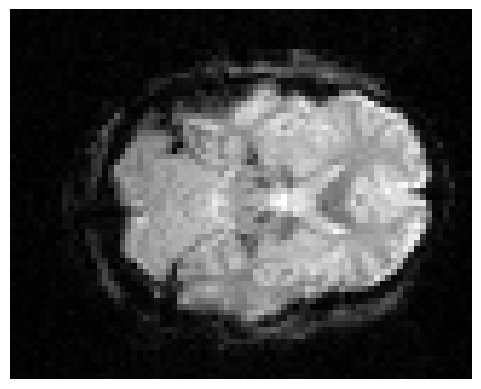

In [ ]:
img1 = nib.load("/content/drive/MyDrive/ABIDE-I dataset/NYU_e/0051154/session_1/rest_1/rest.nii.gz")

  # Get the raw data of the .nii.gz fMRI file.
data = img1.get_fdata()
print(img1.shape)

# new_size = (64, 64)

for i in range(10, 11):
  slice_data = data[:, :, i, 60]
  # resized_img = zoom(slice_data, zoom=(new_size[0] / slice_data.shape[0], new_size[1] / slice_data.shape[1]))
  plt.figure()
  plt.imshow(slice_data, cmap='gray')
  # plt.imsave("check.png", resized_img, cmap='gray')
  plt.axis('off')  # Turn off axis labels

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Directory containing PNG images
image_dir = '/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train/TC'

# Initialize an empty array to store image sizes
image_sizes = []

# Loop through the files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        # Construct the full file path
        file_path = os.path.join(image_dir, filename)

        # Load the image using OpenCV
        image = cv2.imread(file_path)
        # cv2_imshow(image)
        print(image.shape)

"""
        # Check if the image was loaded successfully
        if image is not None:
            # Get the image size (width x height) as a tuple
            image_size = (image.shape[1], image.shape[0], filename)

            # Append the size to the image_sizes array
            image_sizes.append(image_size)
        else:
            print(f"Error loading image: {file_path}")

# Convert the list of image sizes to a NumPy array
image_sizes_array = np.array(image_sizes)

# Print the image sizes as an array
# print(image_sizes_array)
"""

In [ ]:
import PIL.Image

# Load the image
img = PIL.Image.open('/content/slice0050002_011.png')

# Get the image's EXIF metadata
exif = img.getexif()
print(exif)

# Check the image's color space
if exif and 'ColorSpace' in exif:
    color_space = exif['ColorSpace']
    if color_space == 1:
        print('The image is grayscale.')
    elif color_space == 3:
        print('The image is RGB.')
    elif color_space == 4:
        print('The image is RGBA.')
    else:
        print('The image color space is unknown.')
else:
    print('The image does not have any EXIF metadata.')

{}
The image does not have any EXIF metadata.
